# 解答

In [11]:
# pip install japanize-matplotlib matplotlib numpy

In [12]:
# 0. 準備コード

import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語表示用
import numpy as np


## 問題1：病原体感染後の PR1 発現（折れ線グラフ）

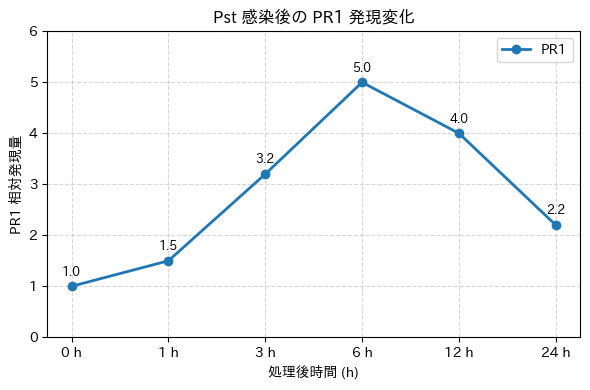

In [13]:
# データ
time_points = ['0 h', '1 h', '3 h', '6 h', '12 h', '24 h']
pr1_expr = [1.0, 1.5, 3.2, 5.0, 4.0, 2.2]

# 折れ線グラフ
plt.figure(figsize=(6, 4))
plt.plot(time_points, pr1_expr, marker='o', color='tab:blue', linewidth=2, label='PR1')

# タイトル・軸ラベル
plt.title('Pst 感染後の PR1 発現変化')
plt.xlabel('処理後時間 (h)')
plt.ylabel('PR1 相対発現量')

# データラベル（発展）
for x, y in zip(time_points, pr1_expr):
    plt.text(x, y + 0.15, f'{y:.1f}', ha='center', va='bottom', fontsize=9)

# y軸範囲（発展）
plt.ylim(0, 6)

# グリッド
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 問題2：変異体間の PR1 発現比較（棒グラフ）

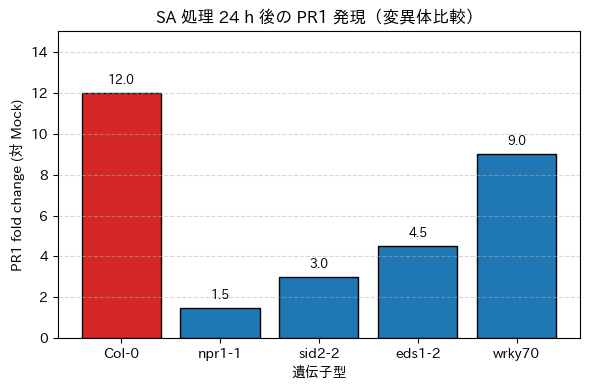

In [14]:
# データ
genotypes = ['Col-0', 'npr1-1', 'sid2-2', 'eds1-2', 'wrky70']
pr1_fc = [12.0, 1.5, 3.0, 4.5, 9.0]

x = np.arange(len(genotypes))

# Col-0 だけ色を変える（発展）
colors = ['tab:red' if g == 'Col-0' else 'tab:blue' for g in genotypes]

plt.figure(figsize=(6, 4))
bars = plt.bar(x, pr1_fc, color=colors, edgecolor='black')

# x 軸の目盛り
plt.xticks(x, genotypes)

# タイトル・軸ラベル
plt.title('SA 処理 24 h 後の PR1 発現（変異体比較）')
plt.xlabel('遺伝子型')
plt.ylabel('PR1 fold change (対 Mock)')

# y軸範囲
plt.ylim(0, 15)

# 棒の上に値を表示（発展）
for xi, yi in zip(x, pr1_fc):
    plt.text(xi, yi + 0.3, f'{yi:.1f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 問題3：防御関連遺伝子の機能カテゴリ（円グラフ）

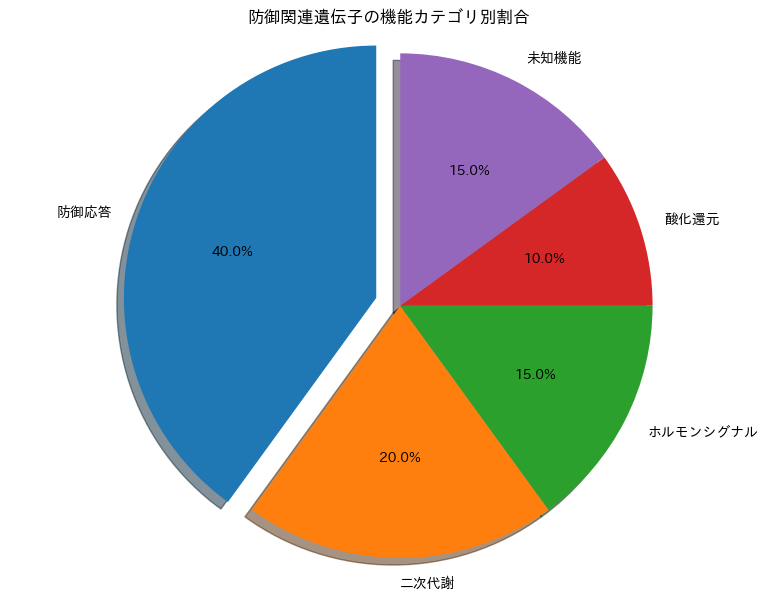

In [15]:
# データ
categories = ['防御応答', '二次代謝', 'ホルモンシグナル', '酸化還元', '未知機能']
percent = [40, 20, 15, 10, 15]

# explode 設定（防御応答だけ飛び出させる）
explode = [0.1, 0, 0, 0, 0]

plt.figure(figsize=(8, 6))
plt.pie(
    percent,
    labels=categories,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True
)
plt.title('防御関連遺伝子の機能カテゴリ別割合')
plt.axis('equal')  # 円を真円に
plt.tight_layout()
plt.show()


## 問題4：SA 濃度と PR1 発現量の関係（散布図）

/var/folders/t6/hykpg_ps0gq3wr5l6632xm480000gn/T/ipykernel_52376/46815426.py:23: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from font(s) IPAexGothic.
  plt.tight_layout()
/Users/mori/.pyenv/py12/.venv12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from font(s) IPAexGothic.
  fig.canvas.print_figure(bytes_io, **kw)


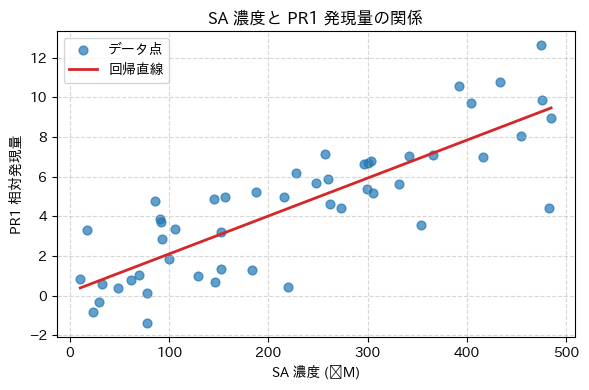

In [16]:
# データ生成
np.random.seed(42)
sa_conc = np.random.uniform(0, 500, 50)  # SA 濃度（µM）
pr1_expr = 0.02 * sa_conc + np.random.normal(0, 2, 50)  # PR1 相対発現量

plt.figure(figsize=(6, 4))
plt.scatter(sa_conc, pr1_expr, s=40, alpha=0.7, label='データ点')

# 回帰直線（発展）
coef = np.polyfit(sa_conc, pr1_expr, 1)
poly = np.poly1d(coef)
x_fit = np.linspace(sa_conc.min(), sa_conc.max(), 100)
y_fit = poly(x_fit)
plt.plot(x_fit, y_fit, color='tab:red', linewidth=2, label='回帰直線')

# タイトル・軸ラベル
plt.title('SA 濃度と PR1 発現量の関係')
plt.xlabel('SA 濃度 (µM)')
plt.ylabel('PR1 相対発現量')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 問題5：RNA-seq の log2 fold change 分布（ヒストグラム）

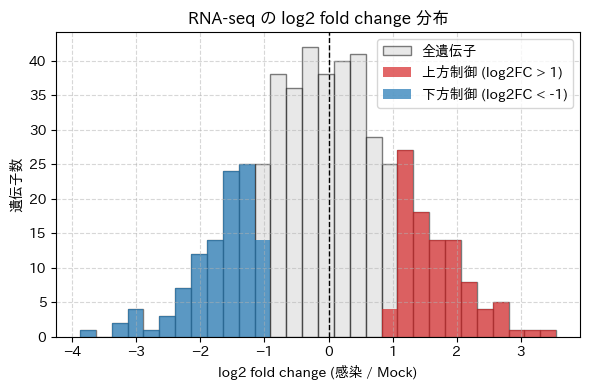

In [17]:
# データ
np.random.seed(123)
log2fc = np.random.normal(0, 1.2, 500)

# ビンの設定
bins = np.linspace(log2fc.min(), log2fc.max(), 31)

plt.figure(figsize=(6, 4))

# 全体
plt.hist(log2fc, bins=bins, color='lightgray', edgecolor='black', alpha=0.5, label='全遺伝子')

# 上方制御
plt.hist(log2fc[log2fc > 1], bins=bins, color='tab:red', alpha=0.7, label='上方制御 (log2FC > 1)')

# 下方制御
plt.hist(log2fc[log2fc < -1], bins=bins, color='tab:blue', alpha=0.7, label='下方制御 (log2FC < -1)')

# log2FC = 0 の縦線
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# タイトル・軸ラベル
plt.title('RNA-seq の log2 fold change 分布')
plt.xlabel('log2 fold change (感染 / Mock)')
plt.ylabel('遺伝子数')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 問題6：複数遺伝子の時間経過発現をまとめて描く（subplot / axes）

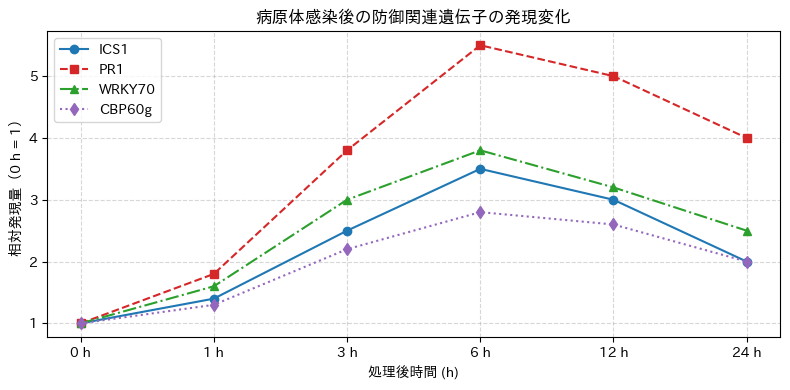

In [18]:
# データ
time_points = ['0 h', '1 h', '3 h', '6 h', '12 h', '24 h']
ics1_expr  = [1.0, 1.4, 2.5, 3.5, 3.0, 2.0]
pr1_expr   = [1.0, 1.8, 3.8, 5.5, 5.0, 4.0]
wrky70_expr= [1.0, 1.6, 3.0, 3.8, 3.2, 2.5]
cbp60g_expr= [1.0, 1.3, 2.2, 2.8, 2.6, 2.0]

# 1つの Axes に4本の折れ線
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(time_points, ics1_expr,  marker='o', linestyle='-',  color='tab:blue',  label='ICS1')
ax.plot(time_points, pr1_expr,   marker='s', linestyle='--', color='tab:red',   label='PR1')
ax.plot(time_points, wrky70_expr,marker='^', linestyle='-.', color='tab:green', label='WRKY70')
ax.plot(time_points, cbp60g_expr,marker='d', linestyle=':',  color='tab:purple',label='CBP60g')

ax.set_title('病原体感染後の防御関連遺伝子の発現変化')
ax.set_xlabel('処理後時間 (h)')
ax.set_ylabel('相対発現量（0 h = 1）')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
fig.tight_layout()
plt.show()


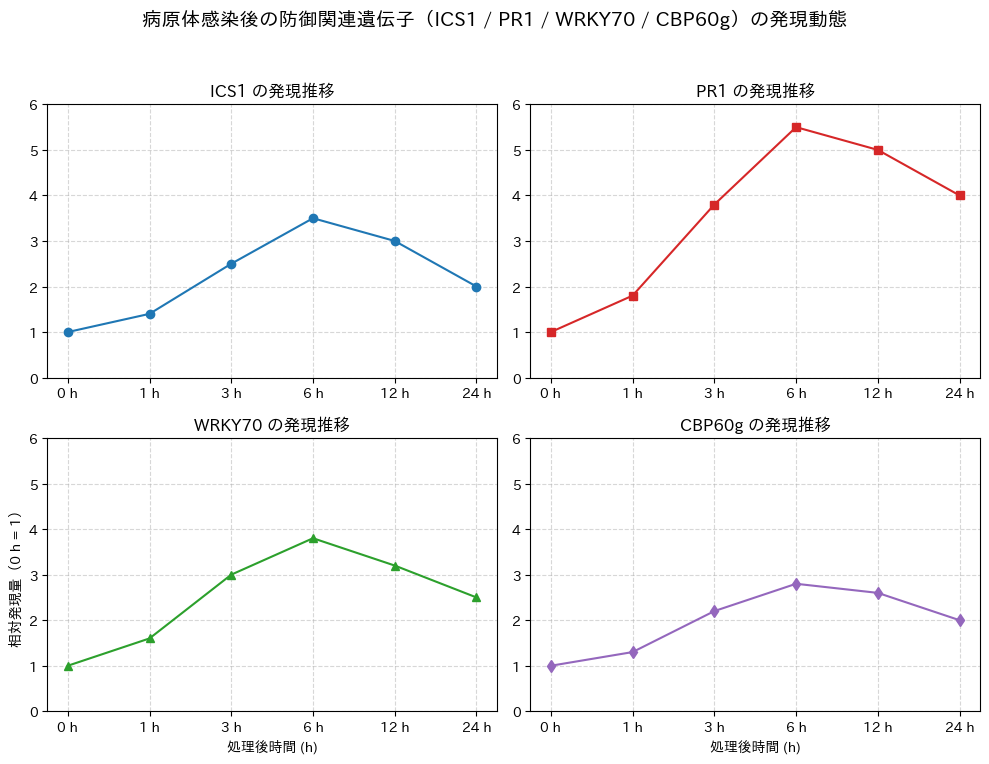

In [19]:
# 2x2 の subplot で各遺伝子を別々に表示
time_points = ['0 h', '1 h', '3 h', '6 h', '12 h', '24 h']
ics1_expr  = [1.0, 1.4, 2.5, 3.5, 3.0, 2.0]
pr1_expr   = [1.0, 1.8, 3.8, 5.5, 5.0, 4.0]
wrky70_expr= [1.0, 1.6, 3.0, 3.8, 3.2, 2.5]
cbp60g_expr= [1.0, 1.3, 2.2, 2.8, 2.6, 2.0]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# ICS1
axes[0, 0].plot(time_points, ics1_expr, marker='o', color='tab:blue')
axes[0, 0].set_title('ICS1 の発現推移')
axes[0, 0].set_ylim(0, 6)
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# PR1
axes[0, 1].plot(time_points, pr1_expr, marker='s', color='tab:red')
axes[0, 1].set_title('PR1 の発現推移')
axes[0, 1].set_ylim(0, 6)
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# WRKY70
axes[1, 0].plot(time_points, wrky70_expr, marker='^', color='tab:green')
axes[1, 0].set_title('WRKY70 の発現推移')
axes[1, 0].set_ylim(0, 6)
axes[1, 0].set_xlabel('処理後時間 (h)')
axes[1, 0].set_ylabel('相対発現量（0 h = 1）')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# CBP60g
axes[1, 1].plot(time_points, cbp60g_expr, marker='d', color='tab:purple')
axes[1, 1].set_title('CBP60g の発現推移')
axes[1, 1].set_ylim(0, 6)
axes[1, 1].set_xlabel('処理後時間 (h)')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

# Figure 全体のタイトル（発展）
fig.suptitle('病原体感染後の防御関連遺伝子（ICS1 / PR1 / WRKY70 / CBP60g）の発現動態', fontsize=14)

# レイアウト調整（発展）
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
